In [47]:
from google.colab import drive
from google.colab import drive
import json
drive.mount('/content/drive')
directory1 = '/content/drive/My Drive/BDA_PROJECT_Spotify/BDS A/000/'
directory2 = '/content/drive/My Drive/BDA_PROJECT_Spotify/BDS A/001/'
directory3 = '/content/drive/My Drive/BDA_PROJECT_Spotify/BDS A/002/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Feature Extraction using MFCC (Mel-frequency cepstral coefficients)

In [43]:
pip install pydub librosa

ERROR: Operation cancelled by user


In [51]:
from pydub import AudioSegment
from pydub.utils import mediainfo
import os
import librosa
import numpy as np

def extract_features_from_directory(directory):
    # Initialize lists to store features and file names
    features = []
    file_names = []

    # Iterate over files in the folder
    for filename in os.listdir(directory):
        if filename.endswith('.mp3'):  # Check if file is an MP3
            file_path = os.path.join(directory, filename)
            # Check file properties using mediainfo
            info = mediainfo(file_path)
            # Check if the file format is MP3 and it has a valid duration
            if info.get('format_name') == 'mp3' and info.get('duration'):
                # Load MP3 audio file using pydub
                audio = AudioSegment.from_file(file_path)
                # Convert MP3 to WAV format (librosa works with WAV)
                wav_data = audio.set_frame_rate(22050).set_channels(1)
                # Export WAV file temporarily (can delete after feature extraction)
                temp_wav_path = os.path.join('/content/', filename[:-4] + '.wav')
                wav_data.export(temp_wav_path, format="wav")

                # Load audio file using librosa
                audio_data, sr = librosa.load(temp_wav_path)
                # Extract features using librosa or any other library
                # For example, let's extract the MFCC (Mel-frequency cepstral coefficients)
                mfccs = librosa.feature.mfcc(y=audio_data, sr=sr)
                # Compute mean MFCCs along time axis
                mean_mfccs = np.mean(mfccs, axis=1)
                # Append the features and file name to lists
                features.append(mean_mfccs)
                file_names.append(filename)

                # Delete temporary WAV file
                os.remove(temp_wav_path)

    # Return extracted features and corresponding file names
    return features, file_names


In [53]:
# Extract features for each directory
features1, file_names1 = extract_features_from_directory(directory1)
features2, file_names2 = extract_features_from_directory(directory2)

In [52]:
features3, file_names3 = extract_features_from_directory(directory3)

In [55]:
features1 = [list(feature) for feature in features1]
print("Formatted features1 list:")
print(features1)
features2 = [list(feature) for feature in features2]
print("Formatted features2 list:")
print(features2)
features3 = [list(feature) for feature in features3]
print("Formatted features3 list:")
print(features3)

Formatted features1 list:
[[-113.34391, 125.36934, 13.350514, 45.778496, 10.976411, -12.0367565, 14.892924, -8.350423, 1.8290002, 1.1804838, 9.957331, 3.0389311, -4.6769414, -6.7885685, -6.5539613, -9.445889, -8.774134, -6.8640304, -7.034915, 0.1911154], [-4.1969323, 47.40636, 25.127323, 23.262398, 4.342435, 12.297678, -9.782985, 6.088621, 5.468358, 5.3923335, 7.848694, -1.3162011, -0.8526565, 6.0711293, -4.3928223, 1.2180796, 0.22598661, -6.3776927, 1.002733, -2.4453402], [-33.964436, 65.84521, -7.1387854, 13.607169, -1.6305033, 8.665496, 14.47021, 3.697254, 5.9808984, 5.126413, 5.355848, 9.15016, 6.021536, 3.8790753, 1.2795774, 2.1322565, -0.5803218, -0.7174857, -0.19224888, 3.9949803], [-137.1051, 160.27658, -48.430584, 25.918304, -27.477736, 3.8369427, -21.946638, -11.5087185, -11.873216, -19.819859, -4.919233, -18.016344, -17.50565, -6.116387, -11.470828, -10.320982, -5.6537404, -10.404307, -6.0673647, -3.5060995], [112.316055, 73.38376, -25.62854, 9.729265, -10.19838, 6.5020156, 

# Standarization

In [56]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def standardize_features(features):
    # Convert features to a NumPy array for standardization
    features_array = np.array(features)
    scaler = StandardScaler()
    # Fit and transform the features using StandardScaler
    standardized_features = scaler.fit_transform(features_array)
    return standardized_features

In [71]:
standardized_features1 = standardize_features(features1)
standardized_features2 = standardize_features(features2)
standardized_features3 = standardize_features(features3)
# Print the standardized features
print("Standardized features1:")
print(standardized_features1)
# Print the standardized features
print("Standardized features2:")
print(standardized_features2)
# Print the standardized features
print("Standardized features3:")
print(standardized_features3)

Standardized features1:
[[ 0.05109504  0.4948731   0.6736346  ... -1.0065473  -1.128634
   0.7923046 ]
 [ 0.95355403 -1.4509752   1.1085137  ... -0.8833121   0.6894401
   0.1430502 ]
 [ 0.7074277  -0.99076706 -0.08296839 ...  0.55095196  0.4191414
   1.7290456 ]
 ...
 [-1.0963626   1.5310724   0.5089943  ... -1.297564   -1.2518715
  -1.2955805 ]
 [-2.3045094   1.5815278   1.222045   ... -0.358417    0.0396081
   1.4533671 ]
 [ 1.7204783  -0.11603837 -1.0955197  ...  0.34932327 -0.19838706
  -0.09581522]]
Standardized features2:
[[ 0.76815647 -0.46558523 -0.6402766  ... -1.0425963   1.1497504
  -0.28295752]
 [ 1.2912052  -1.2280382   0.80191666 ... -0.5659555  -0.3041416
  -0.20066878]
 [ 0.7012368  -0.3401883  -1.2435551  ...  1.6471378   1.574531
   0.05837363]
 ...
 [-1.129139   -0.34635952  0.44826365 ...  0.9691488   1.2969301
   0.6675074 ]
 [-0.02830074 -0.7109996   0.22004527 ... -0.23540103 -0.65186995
  -0.6601114 ]
 [ 0.44469294 -0.12194239 -0.20728536 ...  0.54317844 -1.3481

# Plotting of the data

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

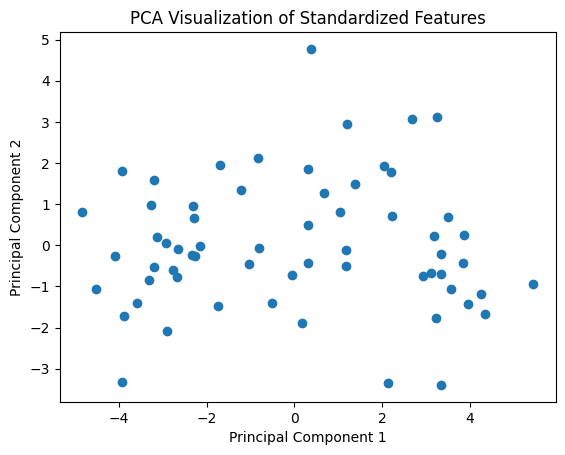

In [60]:
# Assuming standardized_features is your standardized feature matrix
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_features = pca.fit_transform(standardized_features1)

# Scatter plot of the reduced features
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Standardized Features')
plt.show()

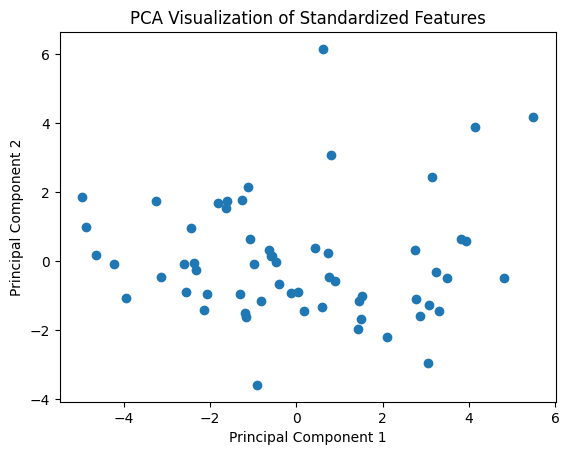

In [61]:

# Assuming standardized_features is your standardized feature matrix
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_features = pca.fit_transform(standardized_features2)

# Scatter plot of the reduced features
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Standardized Features')
plt.show()

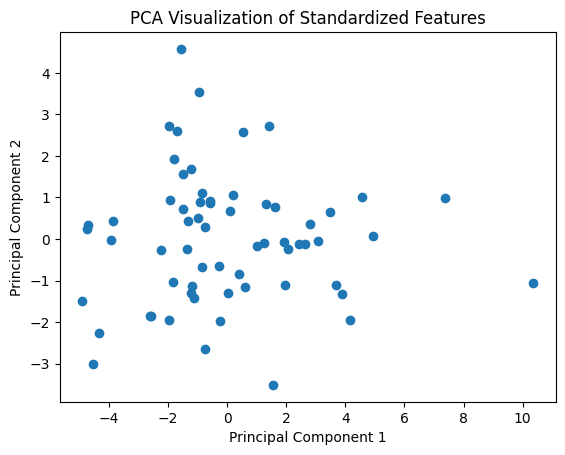

In [62]:

# Assuming standardized_features is your standardized feature matrix
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_features = pca.fit_transform(standardized_features3)

# Scatter plot of the reduced features
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Standardized Features')
plt.show()

# Extracting The Track-ID and directory

In [64]:
from sklearn.decomposition import PCA

def apply_dimensionality_reduction(features):
    # Initialize PCA with desired number of components
    pca = PCA(n_components=10)  # Adjust the number of components as needed
    # Fit PCA on features and transform
    reduced_features = pca.fit_transform(features)
    return reduced_features

In [65]:
reduced_features1 = apply_dimensionality_reduction(standardized_features1)
reduced_features2 = apply_dimensionality_reduction(standardized_features2)
reduced_features3 = apply_dimensionality_reduction(standardized_features3)

In [76]:
import os
import numpy as np
import pandas as pd

def process_directory(directory_path, standardized_features):
    # Define a function to extract the track ID from the filename
    def extract_tid(filename):
        tid = os.path.splitext(filename)[0]
        tid = tid.zfill(6)  # Pad with zeros to make it a 6-digit number
        return tid

    # List to store extracted track IDs and directory names
    track_ids = []
    directory_names = []

    # Iterate over files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.mp3'):  # Check if file is an MP3
            extracted_id = extract_tid(filename)
            track_ids.append(extracted_id)
            directory_names.append(os.path.basename(os.path.dirname(directory_path)))  # Extract directory name

    # Define column names for the DataFrame
    column_names = ['directory_name', 'track_id'] + [f'feature_{i}' for i in range(standardized_features.shape[1])]

    # Concatenate track IDs, directory names, and standardized features
    data = np.column_stack((np.array(directory_names), np.array(track_ids), standardized_features))

    # Create a DataFrame from the concatenated array
    df = pd.DataFrame(data, columns=column_names)

    return df

def combine_dataframes(directory_paths, standardized_features_list):
    # Combine DataFrames for multiple directories
    combined_df = pd.DataFrame()
    for directory_path, standardized_features in zip(directory_paths, standardized_features_list):
        df = process_directory(directory_path, standardized_features)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    return combined_df

if __name__ == "__main__":
    # List of directory paths
    directory_paths = ['/content/drive/My Drive/BDA_PROJECT_Spotify/BDS A/000/',
                       '/content/drive/My Drive/BDA_PROJECT_Spotify/BDS A/001/']

    # List of standardized features for each directory
    standardized_features_list = [standardized_features1, standardized_features2, standardized_features3]

    # Combine DataFrames for all directories
    combined_df = combine_dataframes(directory_paths, standardized_features_list)

    # Write the combined DataFrame to a CSV file
    combined_df.to_csv('Standarized_Data.csv', index=False)
